In [21]:
import numpy as np 
import math 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from PIL import Image

file = 'DATA/list10000polyg_N400_seq0001_be0.400_3d_ooo.dat' # angeica
#file = '/home/leonardo/LCP_B_WORKDIR/PROJECT_knots/data_extracted/list10000polyg_N400_seq0001_be0.400_3d_ooo.dat' # leonardo
with open (file, "r") as myfile:
    full_data = myfile.readlines()
    
data = list(full_data[39][:-1])
print(data)

['2', '3', '3', '3', '2', '0', '4', '3', '5', '5', '5', '1', '2', '0', '5', '0', '2', '4', '3', '4', '2', '0', '4', '5', '3', '2', '4', '0', '0', '4', '3', '3', '4', '3', '1', '5', '3', '3', '1', '2', '4', '4', '4', '0', '1', '1', '2', '0', '1', '0', '1', '1', '3', '4', '3', '1', '1', '1', '5', '3', '5', '5', '4', '2', '3', '5', '1', '2', '2', '4', '3', '4', '4', '4', '0', '2', '3', '1', '1', '2', '1', '2', '3', '5', '3', '2', '4', '5', '5', '0', '2', '4', '2', '0', '2', '4', '5', '4', '0', '1', '0', '4', '2', '1', '1', '1', '5', '4', '3', '5', '5', '1', '2', '1', '0', '0', '2', '4', '4', '4', '0', '5', '1', '2', '0', '5', '0', '1', '5', '4', '4', '2', '3', '2', '4', '0', '2', '4', '0', '2', '3', '1', '3', '2', '1', '5', '0', '5', '3', '1', '0', '0', '5', '4', '0', '0', '2', '1', '1', '1', '1', '3', '3', '5', '1', '3', '4', '3', '3', '3', '1', '5', '3', '5', '3', '2', '4', '5', '0', '2', '2', '1', '3', '2', '0', '0', '1', '5', '5', '1', '3', '4', '2', '1', '0', '2', '0', '5', '5', '0',

In [11]:
cx, cy, cz = 0, 0, 0
#coordinate di ogni passo
fcx,fcy,fcz = [cx],[cy],[cz]
#coordinate di ogni spigolo
X,Y,Z = [cx],[cy],[cz]

N = len(data)

for i in range(0,N):
    if data[i]=='0':
        cx+=1
    elif data[i]=='1':
        cy+=1
    elif data[i]=='2':
        cz+=1        
    elif data[i]=='3':
        cx-=1
    elif data[i]=='4':
        cy-=1
    elif data[i]=='5':
        cz-=1
        
    fcx.append(cx)
    fcy.append(cy)
    fcz.append(cz)
    
    if i < (N-1) and data[i] != data[i+1]:
        X.append(cx)
        Y.append(cy)
        Z.append(cz)
    
    # solo gli spigoli
    # Anche se non è uno spigolo, l'ultimo punto viene considerato
    # come tale
    if i == (N-1):
        X.append(cx)
        Y.append(cy)
        Z.append(cz)

minx,miny,minz=np.amin(fcx),np.amin(fcy),np.amin(fcz)
fcx = np.array(fcx)
fcy = np.array(fcy)
fcz = np.array(fcz)
fcx += abs(minx)
fcy += abs(miny)
fcz += abs(minz)

minX,minY,minZ=np.amin(X),np.amin(Y),np.amin(Z)
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
X += abs(minX)
Y += abs(minY)
Z += abs(minZ)

if (abs(np.sign(X[1]-X[-1])) + abs(np.sign(Y[1]-Y[-1])) + abs(np.sign(Z[1]-Z[-1])))==1:
    X = X[1:]
    Y = Y[1:]
    Z = Z[1:]

if (abs(np.sign(X[-2]-X[0])) + abs(np.sign(Y[-2]-Y[0])) + abs(np.sign(Z[-2]-Z[0])))==1:
    X = X[:-1]
    Y = Y[:-1]
    Z = Z[:-1]


## 3-D Plot


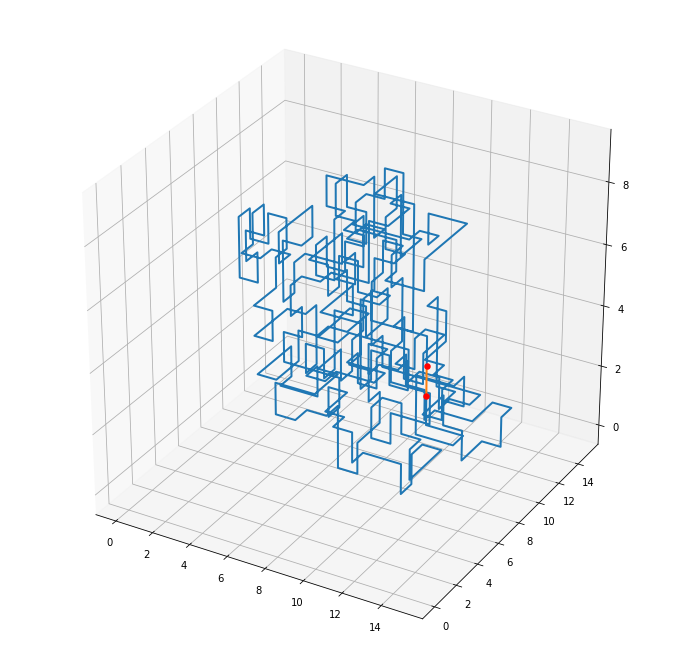

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.plot(fcx, fcy, fcz, lw=2)

ax.scatter(fcx[0], fcy[0], fcz[0], lw=2, c='r')
ax.scatter(fcx[-1], fcy[-1], fcz[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([fcx[0],fcx[-1]], [fcy[0],fcy[-1]], [fcz[0],fcz[-1]], lw=2);

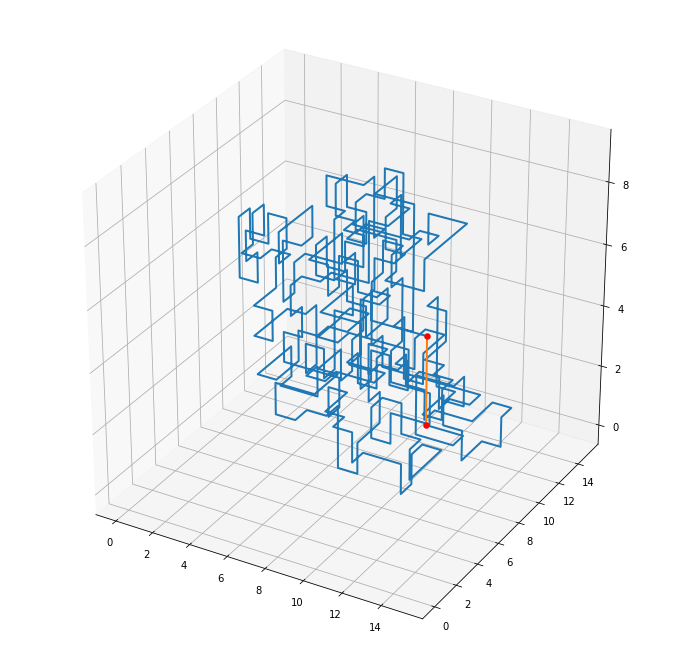

In [13]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( projection='3d')
ax.plot(X, Y, Z, lw=2)

ax.scatter(X[0], Y[0], Z[0], lw=2, c='r')
ax.scatter(X[-1], Y[-1], Z[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([X[0], X[-1]], [Y[0], Y[-1]], [Z[0], Z[-1]], lw=2);

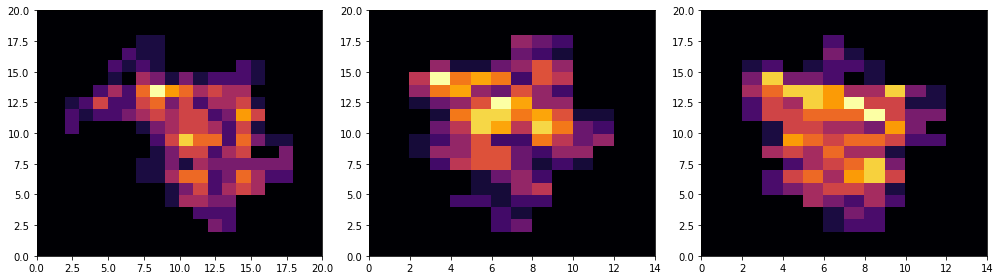

In [14]:
pic2dz = np.zeros(shape=(np.amax(fcx)+5,np.amax(fcy)+5))
pic2dx = np.zeros(shape=(np.amax(fcy)+5,np.amax(fcz)+5))
pic2dy = np.zeros(shape=(np.amax(fcx)+5,np.amax(fcz)+5))

for x,y,z in zip(fcx,fcy,fcz):
    pic2dz[x+2,y+2]+=1
    pic2dx[y+2,z+2]+=1
    pic2dy[x+2,z+2]+=1    

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(14,4))

ax0.pcolor(pic2dz, cmap="inferno")
ax1.pcolor(pic2dx, cmap="inferno")
ax2.pcolor(pic2dy, cmap="inferno")
fig.tight_layout()
plt.show()

## Parametrization 

In [15]:
def dihedral(p1,p2,p3,X,Y,Z):
    
    # ------ q1
    q1 = p2 - p1 # v_(i-1)
    
    # ------ q2
    q2 = p3 - p2 # v_i
    q2_hat = q2/np.sqrt(np.dot(q2,q2))
    
    # ------ q3
    # x = [1,2,3]
    # roll(x,-1) -> [2,3,1]
    tx = np.roll(X,-1) - X
    ty = np.roll(Y,-1) - Y
    tz = np.roll(Z,-1) - Z
    
    n = len(tx)
    q3 = np.hstack((tx.reshape(n,1),
                    ty.reshape(n,1),
                    tz.reshape(n,1)))
    # q3 = [[vx1,vy1,vz1], primo vettore
    #       [vx2,vy2,vz2],
    #       ...
    #       [vxn,vyn,vzn]]
    
    # norma per ogni riga e reshape per farlo diventare
    # un vettore colonna (serve per broadcasting)
    norm = np.linalg.norm(q3,axis=1).reshape(n,1)
    q3_hat = q3/norm
    # ------- /q3
    
    q1_x_q2 = np.cross(q1,q2)
    n1 = q1_x_q2/np.sqrt(np.dot(q1_x_q2,q1_x_q2))
    
    # Qui n2 e u2 hanno la stessa forma di q3 (e q3_hat)
    n2 = np.cross(q2_hat,q3_hat) # broadcasting di q2_hat per ogni riga di q3!
    u2 = np.cross(q2_hat,n2)
    
    # con dot non funziona il broadcasting :C
    cos_theta = np.array([n1.dot(v) for v in n2]) # vettore riga!!
    sin_theta = np.array([n1.dot(v) for v in u2])
    
    return -np.arctan2(sin_theta,cos_theta)


def edist(x1,y1,z1,X,Y,Z):
    tx = (x1-X)**2
    ty = (y1-Y)**2
    tz = (z1-Z)**2
    return np.sqrt(tx + ty + tz)

In [16]:
n = len(X)
#matrice delle distanze relative
d = np.zeros(shape=(n, n))
died = np.zeros(shape=(n, n))
#vettore degli elementi indipendenti
d_indep = []
cross = np.zeros(shape=(n, n))
dot = np.zeros(shape=(n, n))
           
for i in range(0,n):
    
    # DISTANCE
    d[i,:] = edist(X[i],Y[i],Z[i],X,Y,Z)
    
    # DIHEDRAL
    if i < n-1:
        i2=i+1
    else:
        i2=0  
    p1=np.array([X[i-1],Y[i-1],Z[i-1]])
    p2=np.array([X[i],Y[i],Z[i]])
    p3=np.array([X[i2],Y[i2],Z[i2]])
    
    died[i,:] = dihedral(p1,p2,p3,X,Y,Z)
    
died=np.nan_to_num(died)


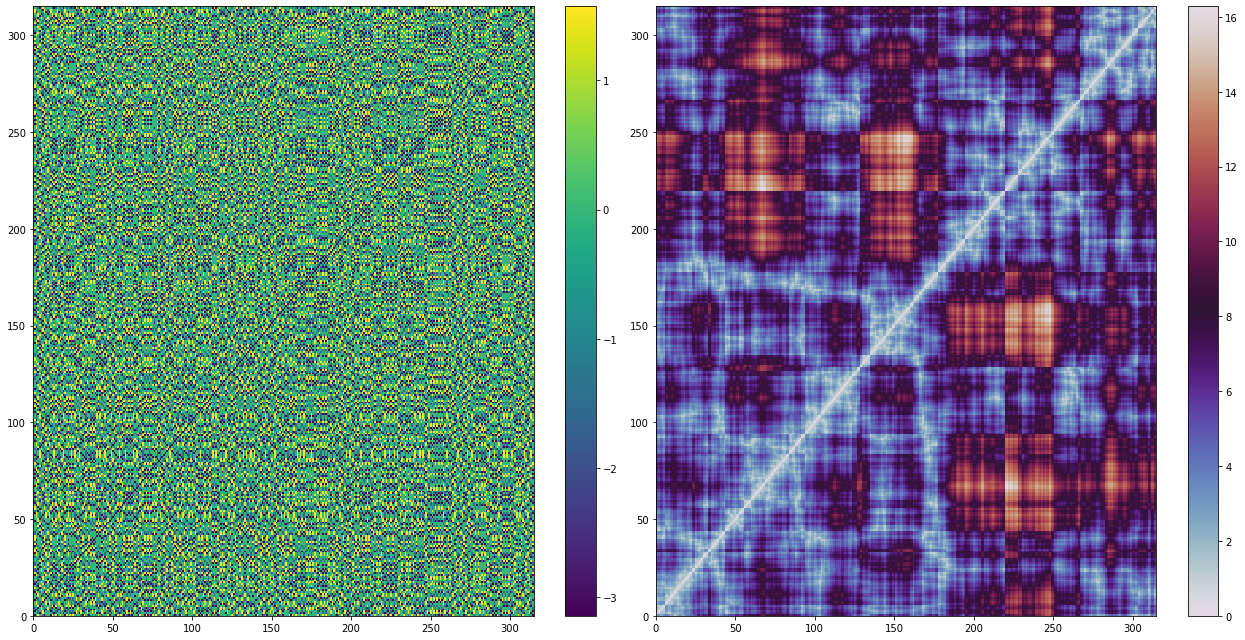

In [25]:
fig, ax= plt.subplots(1,2,figsize=(18,9))

c0=ax[0].pcolor(died)
fig.colorbar(c0, ax=ax[0])
fig.tight_layout()


c1=ax[1].pcolor(d, cmap='twilight')
fig.colorbar(c1, ax=ax[1])
fig.tight_layout()

#c2=ax[1,0].pcolor(scale(cross),cmap='twilight')
#fig.colorbar(c2, ax=ax[1,0])
#fig.tight_layout()

#c3=ax[1,1].pcolor(d, cmap="pink")
#fig.colorbar(c3, ax=ax[1,1])
#fig.tight_layout()
plt.show()

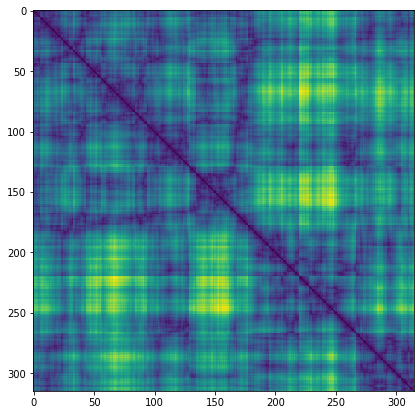

In [29]:
size=len(d)

#arr = np.zeros((4,size,size))
arr=255*(d-d.min())/(d.max()-d.min())
#arr[1]=255*(cross-cross.min())/(cross.max()-cross.min())
#arr[3]=255*(dot-dot.min())/(dot.max()-dot.min())
#arr[2]=255*(died-died.min())/(died.max()-died.min())
img = Image.fromarray(arr.T.astype('uint8'))
fig, ax= plt.subplots(figsize=(8,7))
ax.imshow(img);

## knot types distribution

Number of files opened: 44
Total number of sequences after counting: 439902
Total number of knot type found: 188


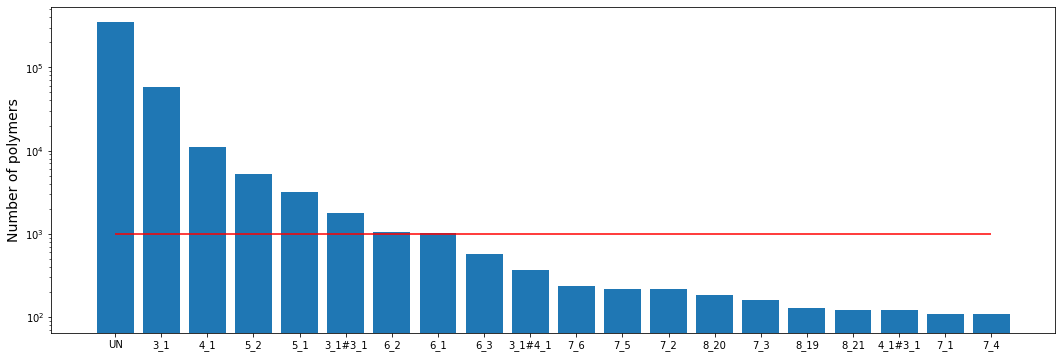

In [32]:
from os import listdir
from collections import Counter
import matplotlib.pyplot as plt

#path_data = './data_extracted/' #leonardo
path_data = './NEW_DATA/' #angelica
files = sorted(listdir(path_data))
files_classified = [s for s in files if s.endswith('hhh.dat.ent')]

classes = Counter({})

for p in files_classified:
    
    knot_type = []
    
    with open(path_data + p, mode='r') as f:
        for line in f:
            knot_type.append(line.split()[2]) 
            
    classes = classes + Counter(knot_type)

# plot
k, n = [], []
cutoff = 100
for knot, number in classes.most_common():
    if number > cutoff:
        k.append(knot)
        n.append(number)
        
plt.figure(figsize=(18,6))
plt.yscale('log')
plt.ylabel('Number of polymers', fontsize=14)
plt.bar(k,n)
plt.hlines(1000, k[0], k[-1], 'r')

# check
print(f'Number of files opened: {len(files_classified)}')
# ho notato che manca la sequenza numero 0039
print(f'Total number of sequences after counting: {sum(classes.values())}')
print(f'Total number of knot type found: {len(classes.keys())}')


## Distribution of number of vertices

In [35]:
#path_data = '/home/leonardo/LCP_B_WORKDIR/PROJECT_knots/data_extracted/' #leonardo
path_data = './NEW_DATA/' #angelica
files = sorted(listdir(path_data))
files_classified = [s for s in files if s.endswith('ooo.dat')]

classes = Counter({})

for p in files_classified:
    
    with open(path_data + p, mode='r') as f:
        
        data = np.array(f.readlines())
        N_position = list(range(1,len(data)+1,4))
        
        data = data[N_position]
        
        for idx,d in enumerate(data):
            data[idx] = d.strip('\n')
        
        classes = classes + Counter(data)

<BarContainer object of 94 artists>

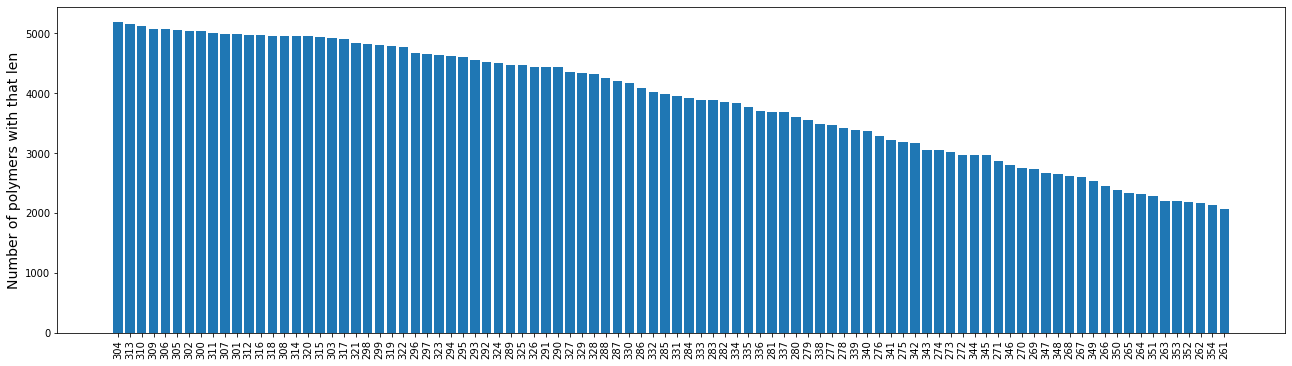

In [37]:
# plot
k, n = [], []
cutoff = 2000
for ver, number in classes.most_common():
    if number > cutoff:
        k.append(ver)
        n.append(number)
        
plt.figure(figsize=(22,6))
plt.ylabel('Number of polymers with that len', fontsize=14)
plt.xticks(rotation=90)
plt.bar(k,n)
# plt.hlines(1000, k[0], k[-1], 'r')

# CNN

In [ ]:
''' Here we must import data in X and Y matrices'''
train_frac = .8

N=X.shape[0]
nchannels=X.shape[1]
L=X.shape[2]

N_train = int(N*train_frac)
x_train = Xf[0:N_train,:,:,:]
y_train = Y[0:N_train,:,:,:]
x_val = Xf[N_train:,:,:,:]
y_val = Y[N_train:,:,:,:]

input_size = (nchannels,L,L)
n_class = 2

In [ ]:
##modello come nell'es 3, possiamo partire da qui e poi modificare quello che serve

def create_model(NCONV=1, n_dense_layers=1, kernel_size_diff=1, summary=False):

    if n_dense_layers < 1:
        raise('n_dense_layer must be int and >= 1')
        
    # Defining regulirizer
    reg = regularizers.l1(0.1)
    # Used to initialize kernel 
    init = initializers.RandomNormal(mean = 0,
                                   stddev = .05)
    model = Sequential()

    if NCONV == 1:
        model.add( Conv1D(filters=5,
                          kernel_size = 11,                              
                          kernel_initializer = init,
                          kernel_regularizer = reg,
                          activation = 'relu',
                          input_shape = input_size
                         ) )
        model.add( AveragePooling1D(5) ) # max pooling windows' size
        model.add( Conv1D(filters=5, 
                          kernel_size = 11 - kernel_size_diff, 
                          activation = 'relu',) )
        model.add( Flatten() )
        for _ in range(n_dense_layers): # variable number of layers
            model.add( Dense(10, activation='relu') )
        model.add( Dropout(0.2) )
        
    elif NCONV == 2:
        model.add( Conv1D(filters=5,
                          kernel_size = 11,                              
                          kernel_initializer = init,
                          kernel_regularizer = reg,
                          activation = 'relu',
                          input_shape = input_size
                         ) )
        model.add( AveragePooling1D(5) ) # max pooling windows' size
        model.add( Flatten() )
        for _ in range(n_dense_layers): # variable number of layers
            model.add( Dense(10, activation='relu') )
        model.add( Dropout(0.2) )
    else:
        raise('NCONV must be an int: 1 or 2')
        
    # Output layer
    model.add(Dense(n_class, activation='softmax')) 
    
    # print model's details
    if summary: print(model.summary())
    # Number of trainable parameters
    trainable_count = count_params(model.trainable_weights)
    
    # Compiling model
    opt = optimizers.Nadam()
    model.compile( loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
    
    return (model, trainable_count)
